# Loan Defaulter Prediction

### Problem Statement
Build a model which predicts loan defaulters based on the loan status.

### Data
In this experiment we will perform Exploratory Data Analysis to prepare a data for linear regression.

## Reading and Understanding the Data

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sb

In [6]:
pwd

'C:\\Users\\Admin\\MS in AI & ML Assignments'

In [7]:
#load Dataset

loan_dataframe = pd.DataFrame(pd.read_csv("loan.csv"))
loan_dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Inspection

In [8]:
loan_dataframe.shape

(39717, 111)

In [9]:
#information about the loan dataframe

loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
#the description of the loan dataframe

loan_dataframe.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [11]:
#Checking the Null Values

round((100*loan_dataframe.isnull().sum())/len(loan_dataframe.index))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [12]:
#Drop All the Columns which Contains 100% NaN Data

loan_dataframe.dropna(axis=1,how='all',inplace=True)
round((100*loan_dataframe.isnull().sum())/len(loan_dataframe.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [13]:
#Drop Columns in which NaN Data is Very High in Percentage

loan_dataframe.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
loan_dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
#Check the Rows which Contains 100% Empty Data

round((100*loan_dataframe.isnull().sum(axis=1))/len(loan_dataframe.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [16]:
#Check the Unique Target Values

loan_dataframe['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [17]:
#Exclude rows with the 'Current Loan Status' because it represents ongoing loans and does not provide historical data.

loan_status_list = ['Fully Paid','Charged Off']
loan_dataframe=loan_dataframe[loan_dataframe['loan_status'].isin(loan_status_list)]
loan_dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [18]:
#Transform the 'Loan Status' data into numerical values, where 'Fully Paid' is represented as 0, and 'Charged Off' is represented as 1

loan_dataframe['loan_status'] = loan_dataframe['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loan_dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
#Perform feature selection by extracting the columns that are likely to have an impact on the target variable

loan_dataframe=loan_dataframe.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose',
             'addr_state','dti')]
loan_dataframe.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


In [20]:
#Generate a New Column based on an Existing Column.

loan_dataframe['year'] = loan_dataframe['issue_d'].apply(lambda x:x.split('-')[1])
loan_dataframe.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


In [21]:
#Change the data type from string to integer and verify the data type after conversion

loan_dataframe['year']=loan_dataframe['year'].astype(int)
type(loan_dataframe['year'][0])

numpy.int32

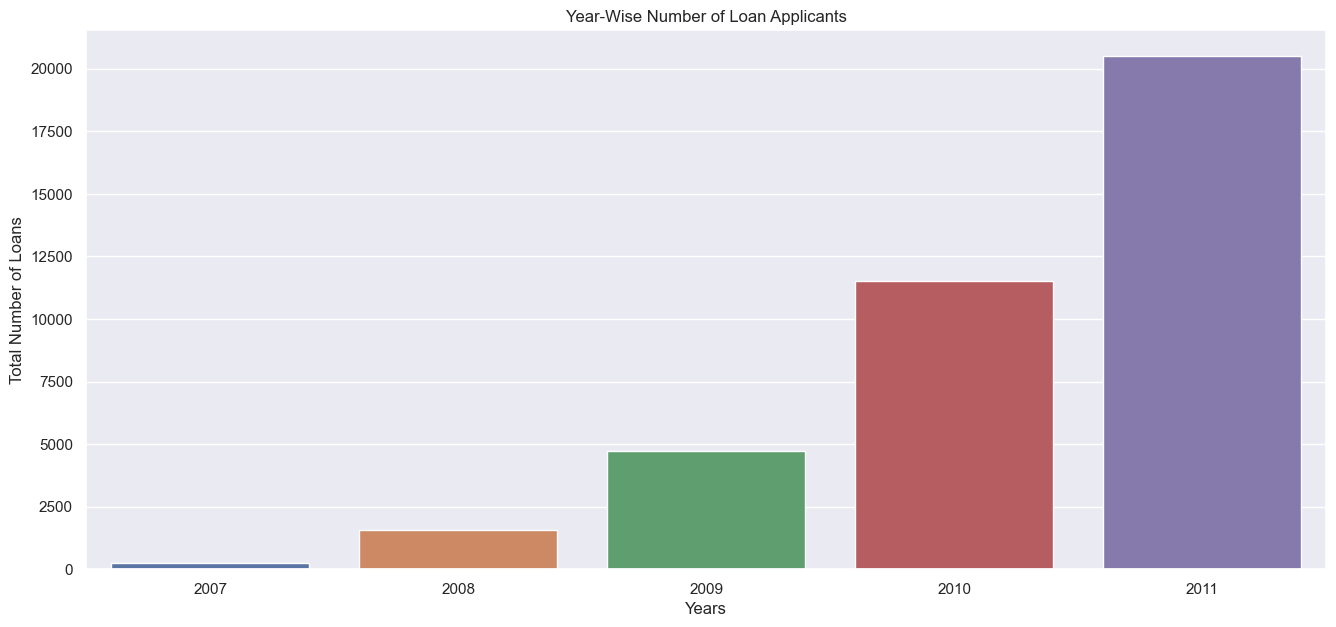

In [22]:
#Create a countplot to visualize the increase in loan amounts year by year in Lending Club

plt.figure(figsize=(16,7))
sb.set(style="darkgrid")
ax=sb.countplot(x='year',data=loan_dataframe)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total Number of Loans',title='Year-Wise Number of Loan Applicants')
plt.xticks(xpos,years)
plt.show()

#### During the period from 2007 to 2011, there was a significant increase in the number of loan applicants, indicating substantial growth in the applicant pool over those five years

In [23]:
#Convert the 'int_rate' column from its current string data type to a more appropriate float data type

loan_dataframe['int_rate'] = loan_dataframe['int_rate'].str.replace('%','')
loan_dataframe['int_rate']=loan_dataframe['int_rate'].astype(float)
type(loan_dataframe['int_rate'][0])

numpy.float64

In [24]:
#Create New Column from the Existing Column

loan_dataframe['month'] = loan_dataframe['issue_d'].apply(lambda x:x.split('-')[0])
loan_dataframe.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


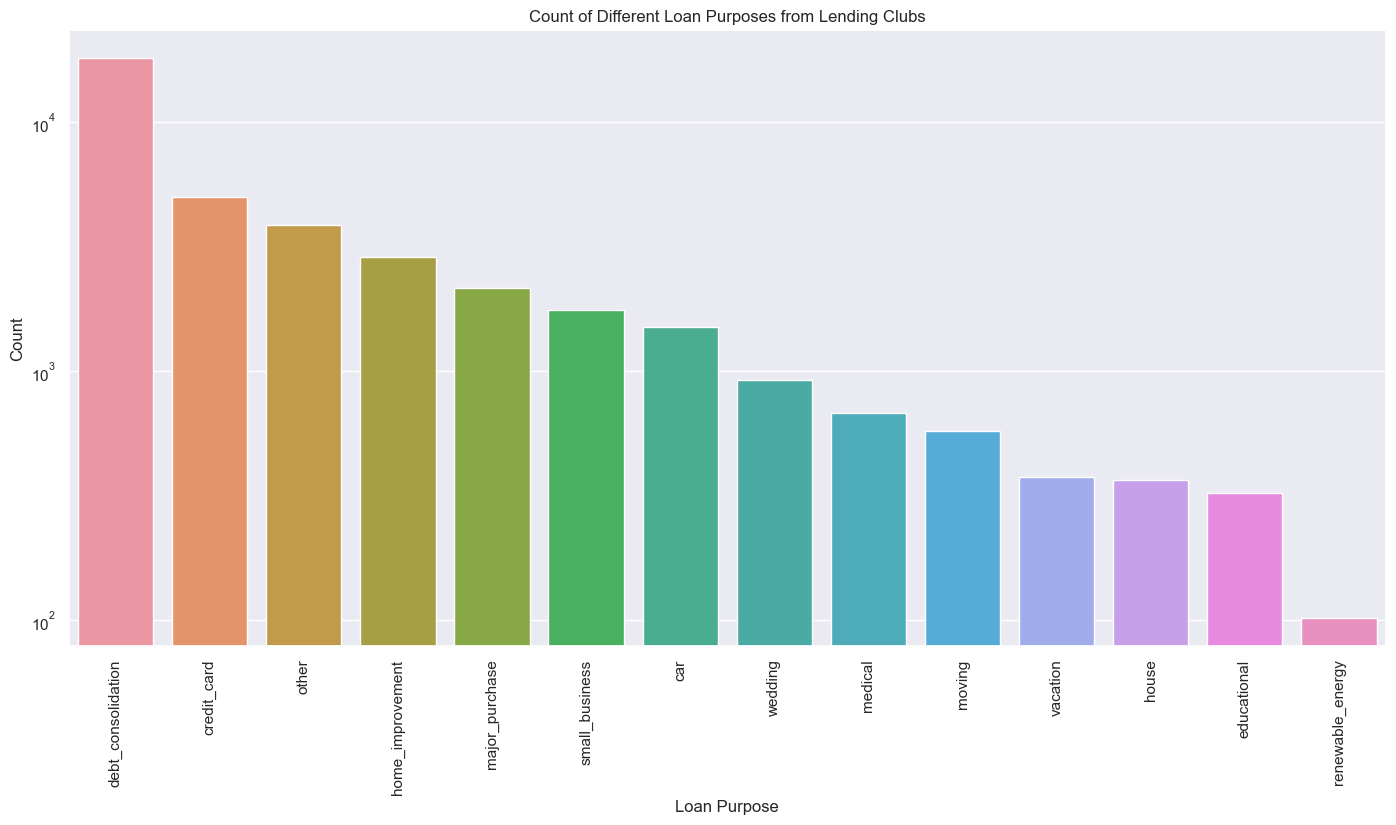

In [25]:
#Create a countplot to display the distribution of loan purposes provided by Lending Clubs

# As 'purpose' is the column containing loan purposes
# Create a countplot to show loan purposes
plt.figure(figsize=(17, 8))
sb.countplot(data=loan_dataframe, x='purpose', order=loan_dataframe['purpose'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yscale('log')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Count of Different Loan Purposes from Lending Clubs')

plt.show()

#### In our analysis, we identified five major purposes for loan applications, with 'debt_consolidation' being the most common loan purpose. 

The top five loan purposes, in descending order of frequency, are as follows:

1. 'debt_consolidation'
2. 'credit_card'
3. 'home_improvement'
4. 'other'
5. 'major_purchase'

#### This insight highlights the prevalence of 'debt_consolidation' as the primary motivation for loan applications within our dataset.

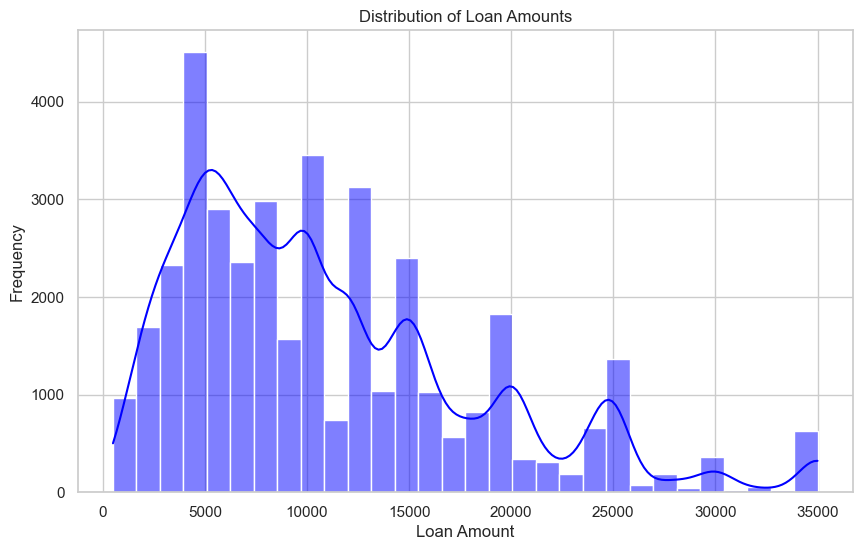

In [26]:
#Visualizing the Distribution of Loan Amounts

# Create a histogram for loan amount distribution
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")
sb.histplot(data=loan_dataframe, x='loan_amnt', bins=30, kde=True, color='blue')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

#### From the plot above, we can visualize the distribution of loan amounts applied by borrowers. It's evident that the majority of loan applicants fall within the loan amount range of 5000 to 10000, indicating that this range is the most common among applicants

In [27]:
#Generate a dedicated DataFrame comprising only the records of borrowers labeled as 'defaulters' based on the 'Loan Status' column

defaulters_df = loan_dataframe.loc[loan_dataframe['loan_status'] == 1]
defaulters_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
8,5600,60 months,21.28,F,4 years,OWN,40000.0,Dec-11,1,small_business,CA,5.55,11,Dec
9,5375,60 months,12.69,B,< 1 year,RENT,15000.0,Dec-11,1,other,TX,18.08,11,Dec
12,9000,36 months,13.49,C,< 1 year,RENT,30000.0,Dec-11,1,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.65,B,3 years,RENT,100000.0,Dec-11,1,other,CA,7.06,11,Dec


In [28]:
# Group the defaulters_df by loan grade and calculate the percentage of defaulters within each grade

grade_defaulters = defaulters_df.groupby('grade').size()
total_loans_by_grade = loan_dataframe.groupby('grade').size()
percentage_defaulters_by_grade = (grade_defaulters / total_loans_by_grade * 100).round(2)

# Create a DataFrame to display the results

defaulters_percentage_df = pd.DataFrame({
    'Defaulters': grade_defaulters,
    'Total Loans': total_loans_by_grade,
    'Percentage Defaulters (%)': percentage_defaulters_by_grade
})

# Reset the index to make 'grade' a regular column

defaulters_percentage_df.reset_index(inplace=True)

# Sort the DataFrame by grade for better readability

defaulters_percentage_df.sort_values(by='grade', inplace=True)

# Display the result

defaulters_percentage_df


,grade,Defaulters,Total Loans,Percentage Defaulters (%)
0,A,602,10045,5.99
1,B,1425,11675,12.21
2,C,1347,7834,17.19
3,D,1118,5085,21.99
4,E,715,2663,26.85
5,F,319,976,32.68
6,G,101,299,33.78


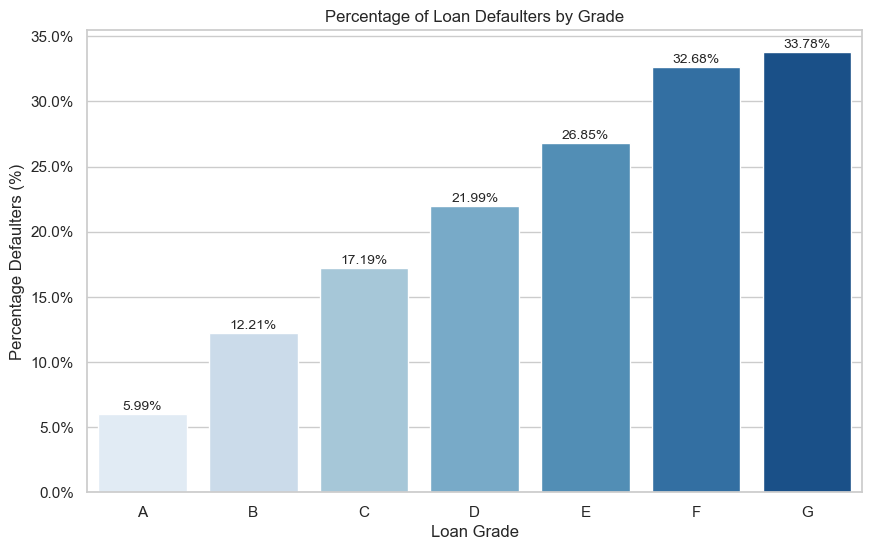

In [29]:
#Visualizing the Percentage of Defaulters

import matplotlib.ticker as ticker

# Set a color palette for the bars

colors = sb.color_palette('Blues', len(defaulters_percentage_df))

# Create a bar plot to display the percentages

plt.figure(figsize=(10, 6))
bars = sb.barplot(data=defaulters_percentage_df, x='grade', y='Percentage Defaulters (%)', palette=colors)
plt.xlabel('Loan Grade')
plt.ylabel('Percentage Defaulters (%)')
plt.title('Percentage of Loan Defaulters by Grade')
plt.xticks(rotation=0)

def percent_formatter(x, pos):
    return f'{x}%'

y_formatter = ticker.FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

# Display the percentages on top of the bars

for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.show()

#### It's notable that Grade G exhibits the highest percentage of defaulters among all loan grades. This indicates that borrowers assigned to Grade G are more likely to default on their loans compared to other grade categories.

In [30]:
# Group the defaulters_df by loan purpose and calculate the percentage of defaulters within each purpose

purpose_defaulters = defaulters_df.groupby('purpose').size()
total_loans_by_purpose = loan_dataframe.groupby('purpose').size()
percentage_defaulters_by_purpose = (purpose_defaulters / total_loans_by_purpose * 100).round(2)

# Create a DataFrame to display the results

defaulters_percentage_by_purpose_df = pd.DataFrame({
    'Defaulters': purpose_defaulters,
    'Total Loans': total_loans_by_purpose,
    'Percentage Defaulters (%)': percentage_defaulters_by_purpose
})

# Reset the index to make 'purpose' a regular column

defaulters_percentage_by_purpose_df.reset_index(inplace=True)

# Sort the DataFrame by percentage defaulters for better readability

defaulters_percentage_by_purpose_df.sort_values(by='Percentage Defaulters (%)', ascending=False, inplace=True)

# Display the result

defaulters_percentage_by_purpose_df


,purpose,Defaulters,Total Loans,Percentage Defaulters (%)
11,small_business,475,1754,27.08
10,renewable_energy,19,102,18.63
3,educational,56,325,17.23
9,other,633,3865,16.38
5,house,59,367,16.08
8,moving,92,576,15.97
7,medical,106,681,15.57
2,debt_consolidation,2767,18055,15.33
12,vacation,53,375,14.13
4,home_improvement,347,2875,12.07


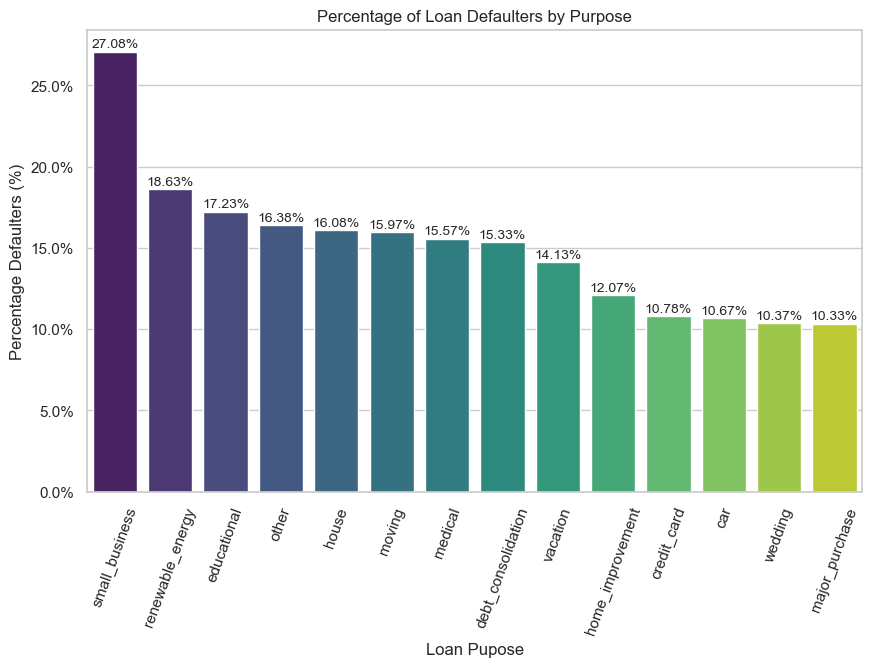

In [31]:
# Create a bar plot to display the percentages by loan purpose

plt.figure(figsize=(10, 6))
sb.barplot(data=defaulters_percentage_by_purpose_df, x='purpose', y='Percentage Defaulters (%)', palette='viridis')
plt.xlabel('Loan Pupose')
plt.ylabel('Percentage Defaulters (%)')
plt.title('Percentage of Loan Defaulters by Purpose')
plt.xticks(rotation=70)

def percent_formatter(x, pos):
    return f'{x}%'

y_formatter = ticker.FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

# Display the percentages on the bars

bars = plt.gca().patches

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.show()

#### It's worth noting that the loan purpose 'small_business' exhibits the highest percentage of risk of defaulters among all loan purposes. This is followed by 'renewable_energy' and 'educational' purposes, indicating a higher likelihood of default in these categories

In [32]:
# Group the defaulters_df by employee experience and calculate the percentage of defaulters within each category

experience_defaulters = defaulters_df.groupby('emp_length').size()
total_loans_by_experience = loan_dataframe.groupby('emp_length').size()
percentage_defaulters_by_experience = (experience_defaulters / total_loans_by_experience * 100).round(2)

# Create a DataFrame to display the results

defaulters_percentage_by_experience_df = pd.DataFrame({
    'Defaulters': experience_defaulters,
    'Total Loans': total_loans_by_experience,
    'Percentage Defaulters (%)': percentage_defaulters_by_experience
})

# Reset the index to make 'emp_length' a regular column

defaulters_percentage_by_experience_df.reset_index(inplace=True)

# Sort the DataFrame by percentage defaulters for better readability

defaulters_percentage_by_experience_df.sort_values(by='Percentage Defaulters (%)', ascending=False, inplace=True)

# Display the result

defaulters_percentage_by_experience_df

,emp_length,Defaulters,Total Loans,Percentage Defaulters (%)
1,10+ years,1331,8488,15.68
7,7 years,263,1711,15.37
0,1 year,456,3169,14.39
5,5 years,458,3194,14.34
10,< 1 year,639,4508,14.17
6,6 years,307,2168,14.16
8,8 years,203,1435,14.15
3,3 years,555,4012,13.83
4,4 years,462,3342,13.82
2,2 years,567,4291,13.21


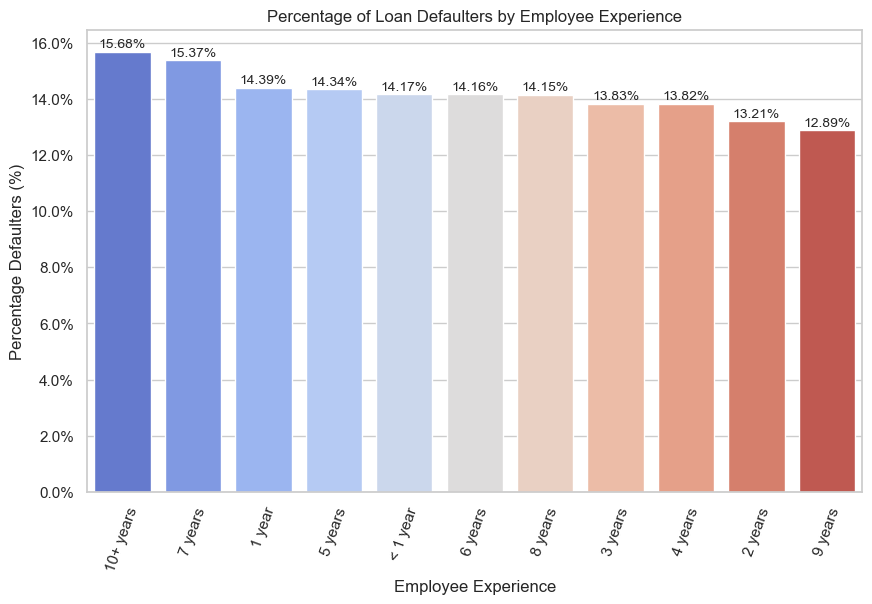

In [33]:
# Create a bar plot to display the percentages by employee experience

plt.figure(figsize=(10, 6))
sb.barplot(data=defaulters_percentage_by_experience_df, x='emp_length', y='Percentage Defaulters (%)', palette='coolwarm')
plt.xlabel('Employee Experience')
plt.ylabel('Percentage Defaulters (%)')
plt.title('Percentage of Loan Defaulters by Employee Experience')
plt.xticks(rotation=70)

def percent_formatter(x, pos):
    return f'{x}%'

y_formatter = ticker.FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

# Display the percentages on the bars

bars = plt.gca().patches

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.show()

#### It's noteworthy that the highest percentage of risk of defaulters is associated with customers having 10+ years of experience. On the other hand, the lowest percentage of risk is observed among customers with 9 years of experience. Customers with other years of experience fall in between these extremes, indicating varying levels of risk.

In [34]:
# Group the defaulters_df by home ownership and calculate the percentage of defaulters within each category

ownership_defaulters = defaulters_df.groupby('home_ownership').size()
total_loans_by_ownership = loan_dataframe.groupby('home_ownership').size()
percentage_defaulters_by_ownership = (ownership_defaulters / total_loans_by_ownership * 100).round(2)

# Create a DataFrame to display the results

defaulters_percentage_by_ownership_df = pd.DataFrame({
    'Defaulters': ownership_defaulters,
    'Total Loans': total_loans_by_ownership,
    'Percentage Defaulters (%)': percentage_defaulters_by_ownership
})

# Reset the index to make 'home_ownership' a regular column

defaulters_percentage_by_ownership_df.reset_index(inplace=True)

# Sort the DataFrame by percentage defaulters for better readability

defaulters_percentage_by_ownership_df.sort_values(by='Percentage Defaulters (%)', ascending=False, inplace=True)
defaulters_percentage_by_ownership_df.dropna(inplace=True)
# Display the result

defaulters_percentage_by_ownership_df

,home_ownership,Defaulters,Total Loans,Percentage Defaulters (%)
2,OTHER,18.0,98,18.37
4,RENT,2839.0,18480,15.36
3,OWN,443.0,2975,14.89
0,MORTGAGE,2327.0,17021,13.67


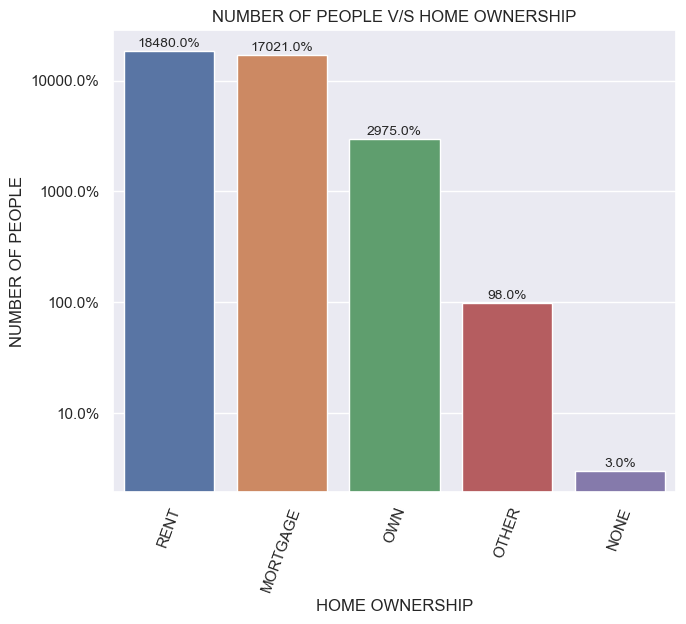

In [35]:
import matplotlib.ticker as mtick

# Set the Seaborn style

sb.set(style="darkgrid")

# Create a figure with a specified size

plt.figure(figsize=(16, 6))

# Plot the number of people with different home ownership statuses

plt.subplot(1, 2, 1)
ax1 = sb.countplot(x='home_ownership', data=loan_dataframe, order=loan_dataframe['home_ownership'].value_counts().index)
ax1.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE', title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=70)
plt.yscale('log')

def percent_formatter(x, pos):
    return f'{x}%'

y_formatter = ticker.FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

# Display the percentages on the bars

bars = plt.gca().patches

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)


# Show the plots

plt.show()


#### The analysis reveals that the number of people who have home ownership categorized as 'Rent' is the highest among all the home ownership categories in the dataset.

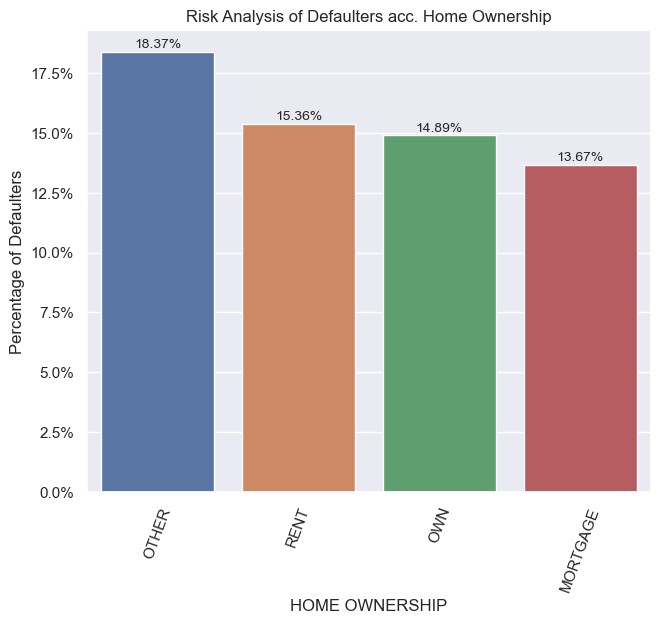

In [36]:
# Set the Seaborn style
sb.set(style="darkgrid")

# Create a figure with a specified size
plt.figure(figsize=(16, 6))

# Plot the percentage of defaulters based on home ownership
plt.subplot(1, 2, 2)
ax2 = sb.barplot(x='home_ownership', y='Percentage Defaulters (%)', data=defaulters_percentage_by_ownership_df)
ax2.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters', title='Risk Analysis of Defaulters acc. Home Ownership')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=70)

def percent_formatter(x, pos):
    return f'{x}%'

y_formatter = ticker.FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

# Display the percentages on the bars

bars = plt.gca().patches

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)


# Show the plots
plt.show()


#### When considering the percentage of defaulters based on home ownership, the highest percentage is observed among those categorized as 'Other,' followed by 'Rent,' 'Own,' and 'Mortgage,' in descending order.

## Bivariate Analysis

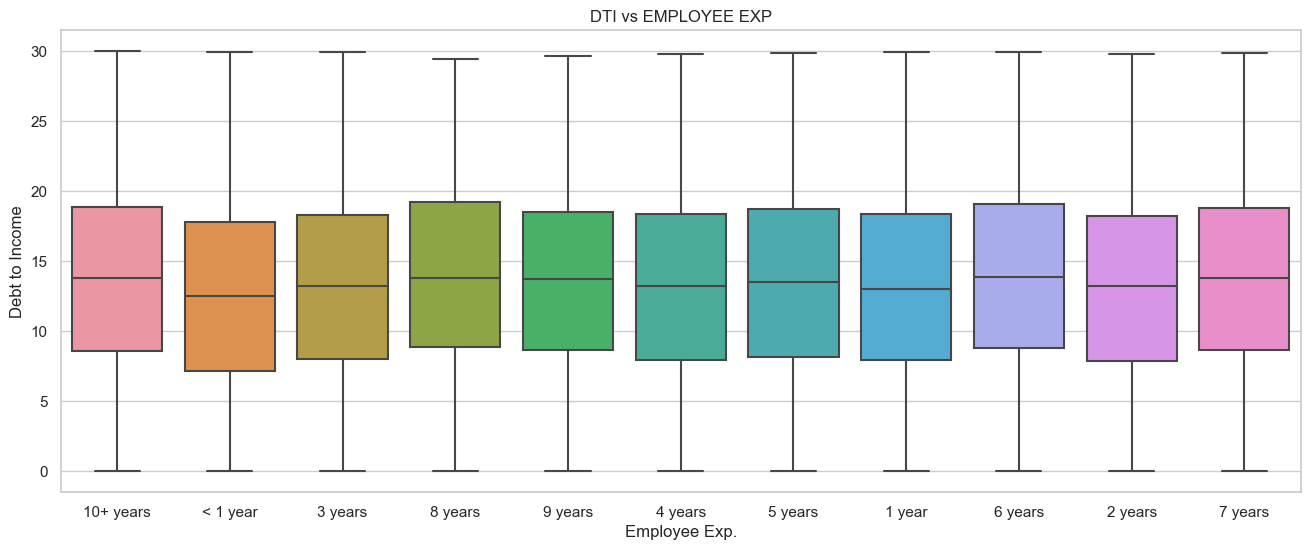

In [37]:
#creates a boxplot of debt to income (DTI) versus employee experience (emp_length)

# Set the Seaborn Style

sb.set(style="whitegrid")

# Create a boxplot

plt.figure(figsize=(16, 6))
ax = sb.boxplot(x='emp_length', y='dti', data=loan_dataframe)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income', title='DTI vs EMPLOYEE EXP')
plt.show()

#### After conducting a bivariate analysis of debt to income (DTI) versus employee experience, a notable pattern emerges. Employees with 10+ years of experience exhibit a significantly wider range of DTI values, indicating a greater variability in their debt to income ratios. In contrast, employees with fewer years of experience generally fall within a more consistent DTI range. This suggests that employee experience, particularly in the '10+ years' category, may have a significant influence on DTI, potentially reflecting variations in financial circumstances and obligations.

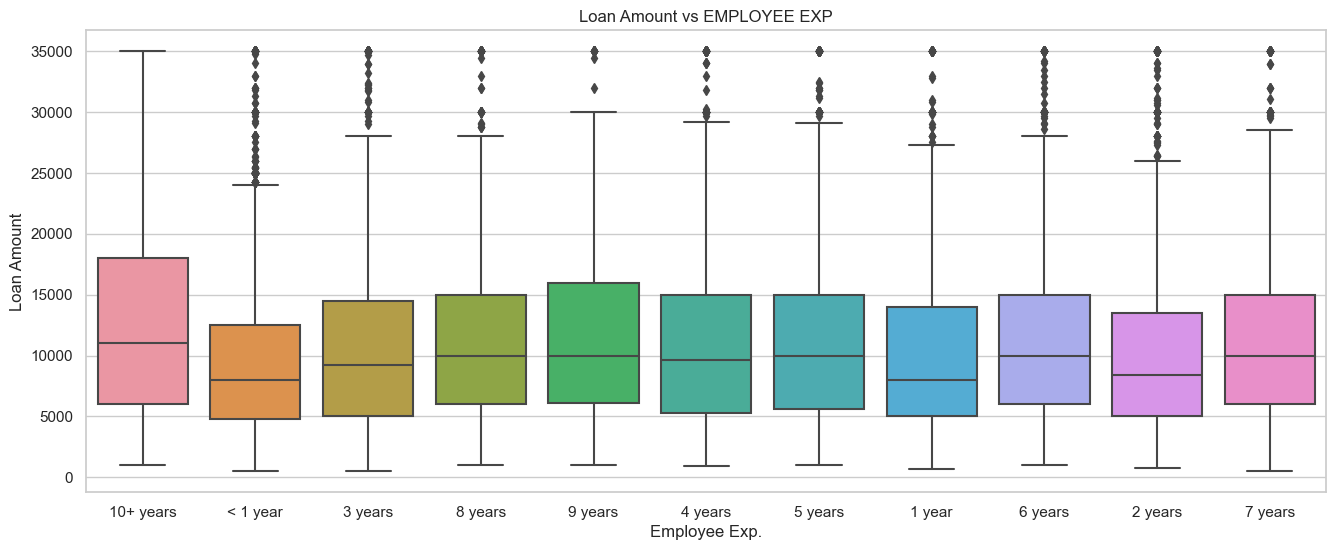

In [38]:
#creates a boxplot of loan amount versus employee experience (emp_length)

# Set the Seaborn style
sb.set(style="whitegrid")

# Create a boxplot

plt.figure(figsize=(16, 6))
ax = sb.boxplot(x='emp_length', y='loan_amnt', data=loan_dataframe)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount', title='Loan Amount vs EMPLOYEE EXP')
plt.show()

#### The bivariate analysis reveals a clear trend in the relationship between employee experience and loan amount. Borrowers with 10+ years of experience tend to request higher loan amounts, while those with less than 1 year of experience typically request lower loan amounts. This suggests that employee experience plays a significant role in determining the loan amount requested, with more experienced individuals seeking larger loans, possibly due to their financial stability and creditworthiness.

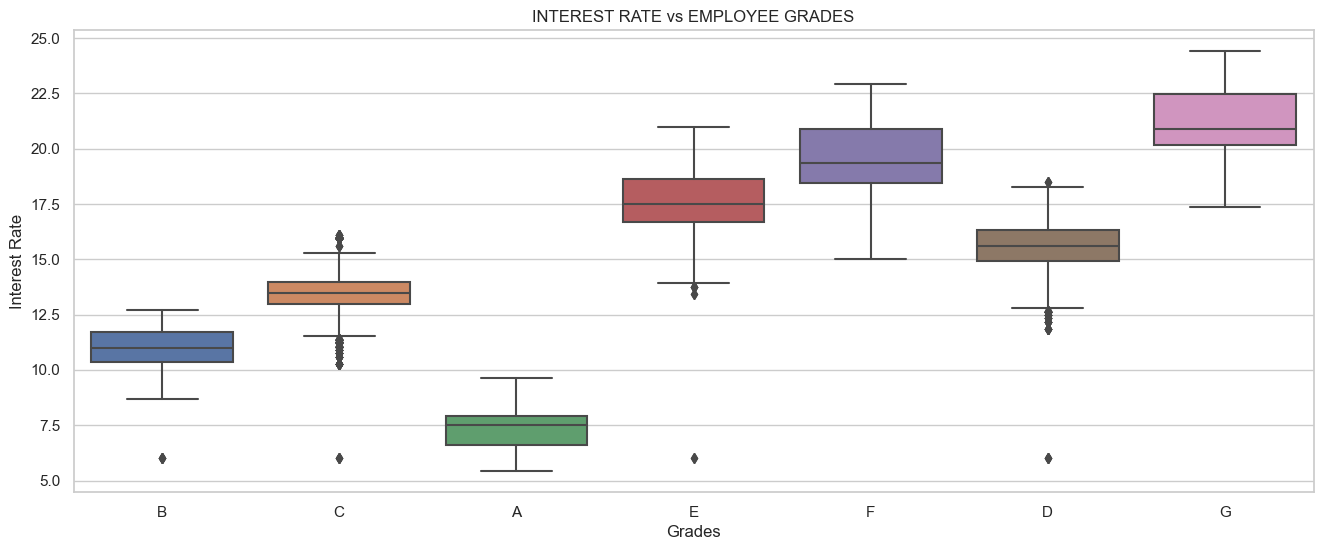

In [39]:
# Creates a boxplot of interest rates versus loan grades (grade)

# Set the Seaborn style

sb.set(style="whitegrid")

# Create a boxplot

plt.figure(figsize=(16, 6))
ax = sb.boxplot(x='grade', y='int_rate', data=loan_dataframe)
ax.set(xlabel='Grades', ylabel='Interest Rate', title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

#### Based on the visual analysis of the boxplot, it becomes evident that interest rates tend to vary significantly across different loan grades. Specifically, loans categorized under 'A' grade exhibit the lowest interest rates, signifying a lower cost of borrowing. On the other hand, loans categorized under 'B' grade tend to have higher interest rates, suggesting a relatively higher cost of borrowing for borrowers in this category. This visualization highlights the role of loan grades in determining interest rates, with lower-grade loans incurring higher interest costs.

In [40]:
# Calculates the median interest rate ('int_rate') within each grade category

grade_group = loan_dataframe.groupby('grade')
median_interest_rates = grade_group['int_rate'].median()
median_interest_rates


grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [41]:
# Calculates the median loan amount ('loan_amnt') within each employee experience category

emp_group = loan_dataframe.groupby('emp_length')
median_loan_amounts_by_emp_length = emp_group['loan_amnt'].median()
median_loan_amounts_by_emp_length

emp_length
1 year        8000.0
10+ years    11000.0
2 years       8400.0
3 years       9225.0
4 years       9600.0
5 years      10000.0
6 years      10000.0
7 years      10000.0
8 years      10000.0
9 years      10000.0
< 1 year      8000.0
Name: loan_amnt, dtype: float64

In [44]:
# Group the defaulters_df by state and calculate the percentage of defaulters within each state category

state_defaulters = defaulters_df['addr_state'].value_counts()
total_loans_by_state = loan_dataframe['addr_state'].value_counts()
percentage_defaulters_by_state = (state_defaulters / total_loans_by_state * 100).round(2)

# Create a DataFrame to display the results

defaulters_percentage_by_state_df = pd.DataFrame({
    'Defaulters': state_defaulters,
    'Total Loans': total_loans_by_state,
    'Percentage Defaulters (%)': percentage_defaulters_by_state
})

# Reset the index to make 'addr_state' a regular column

defaulters_percentage_by_state_df.reset_index(inplace=True)
defaulters_percentage_by_state_df.rename(columns={'index': 'State'}, inplace=True)

# Sort the DataFrame by percentage defaulters for better readability

defaulters_percentage_by_state_df.sort_values(by='Percentage Defaulters (%)', ascending=False, inplace=True)
defaulters_percentage_by_state_df.dropna(inplace=True)
# Display the result

defaulters_percentage_by_state_df = defaulters_percentage_by_state_df.head(10)

defaulters_percentage_by_state_df


,State,Defaulters,Total Loans,Percentage Defaulters (%)
28,NE,3.0,5,60.00
32,NV,108.0,479,22.55
40,SD,12.0,62,19.35
0,AK,15.0,78,19.23
9,FL,504.0,2781,18.12
24,MO,114.0,670,17.01
11,HI,28.0,166,16.87
13,ID,1.0,6,16.67
31,NM,30.0,183,16.39
36,OR,71.0,435,16.32


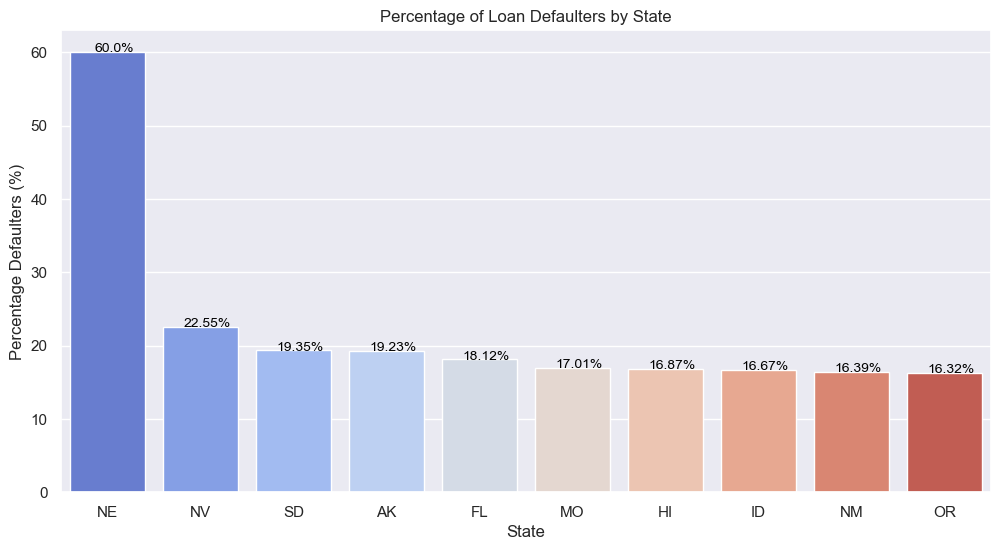

In [66]:
#Set the Seaborn style

sb.set(style="darkgrid")

#Create a figure with a specified size

plt.figure(figsize=(12, 6))
sb.barplot(data=defaulters_percentage_by_state_df, x='State', y='Percentage Defaulters (%)', palette='coolwarm')
plt.xlabel('State')
plt.ylabel('Percentage Defaulters (%)')
plt.title('Percentage of Loan Defaulters by State')

# Display the percentages on the bars

bars = plt.gca().patches

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(5, 0), textcoords='offset points', ha='center', fontsize=10, color='black')  # Ensure text color is black

plt.show()

####  It's important to note that the highest percentage of defaulters is observed in the Northeast (address) region, accounting for 60%. This information can be crucial for making informed decisions and risk assessments in the lending business, as it highlights the region with the highest default risk.

In [61]:
# Group the defaulters_df by term and calculate the number of defaulters

defaulters_by_term = defaulters_df.groupby('term').size()

# Calculate the total number of loans by term from the original loan_df DataFrame

total_loans_by_term = loan_dataframe['term'].value_counts()

# Calculate the percentage of defaulters for each term

percentage_defaulters_by_term = (defaulters_by_term / total_loans_by_term * 100).round(2)

# Create a DataFrame to display the results

defaulters_percentage_by_term_df = pd.DataFrame({
    'Term': percentage_defaulters_by_term.index,
    'Percentage Defaulters (%)': percentage_defaulters_by_term.values
})

# Sort the DataFrame by percentage defaulters for better readability

defaulters_percentage_by_term_df.sort_values(by='Percentage Defaulters (%)', ascending=False, inplace=True)
defaulters_percentage_by_term_df.dropna(inplace=True)

# Reset the index to make 'term' a regular column

defaulters_percentage_by_term_df.reset_index(inplace=True, drop=True)

# Display the result

defaulters_percentage_by_term_df


,Term,Percentage Defaulters (%)
0,60 months,25.31
1,36 months,11.09


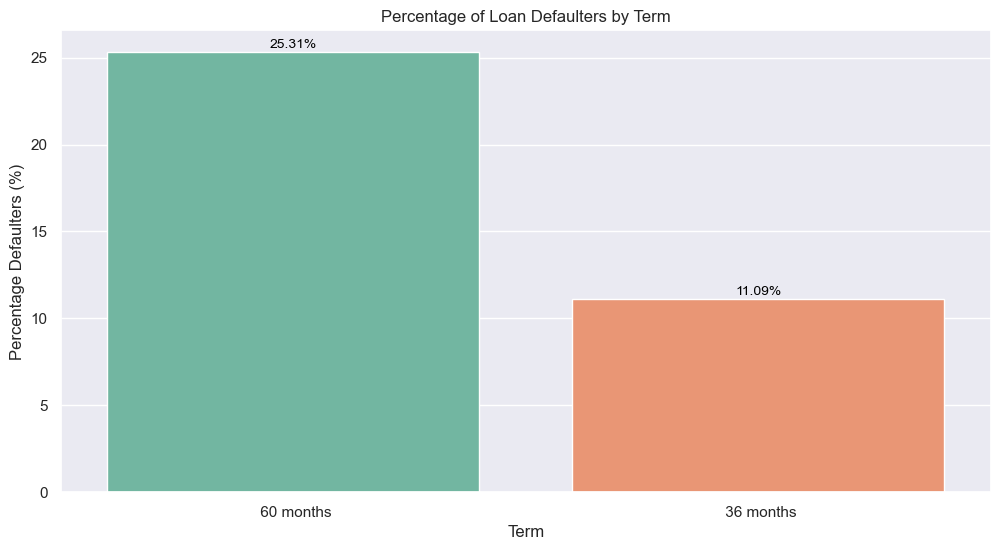

In [65]:
# Set the Seaborn style
sb.set(style="darkgrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Create a bar plot for the term percentage dataframe
ax = sb.barplot(data=defaulters_percentage_by_term_df, x='Term', y='Percentage Defaulters (%)', palette='Set2')
plt.xlabel('Term')
plt.ylabel('Percentage Defaulters (%)')
plt.title('Percentage of Loan Defaulters by Term')

# Display the percentages on the bars
for p in ax.patches:
    height = p.get_height()
    plt.annotate(f'{height}%', xy=(p.get_x() + p.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10, color='black')  # Ensure text color is black

plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()

#### Analysis of loan terms reveals that a higher percentage of defaulters, approximately 25.31%, are observed in the 60-month loan term compared to the 36-month loan term, which has a lower default rate of approximately 11.09%. This suggests that longer loan terms may carry a higher risk of default.